<a href="https://colab.research.google.com/github/ricardogando/brincadeiras/blob/master/2024yr4riskesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Evolução da probabilidade de impacto do asteroide 2024 YR4**

Esse asteroide ganhou notoriedade recentemente por ter uma chance de colidir com a Terra em 2032.

A partir daí passou a ser monitorado mais de perto por vários telescópios.

Com a melhor determinação de sua órbita, essa probabilidade de impacto ficou melhor conhecida e diminuiu, a ponto de não apresentar risco para a Terra.

Você pode ler mais em (inglês) https://blogs.esa.int/rocketscience/2025/02/04/asteroid-2024-yr4-latest-updates/

Vamos fazer um exercício tecnológico e verificar como a probabilidade de impacto variou com o tempo?

Essas informações foram extraídas a partir de uma GIF animada da ESA que mostra a faixa prevista de impacto em comparação ao sistema Terra-Lua.

https://blogs.esa.int/rocketscience/files/2025/02/YR4-risk-GIF-pause-crop-21Feb-with-percentage-bold.gif

Disclaimer: esse não é o melhor código ou mais rápido, mas apenas a demonstração de que é possível fazer códigos relativamente complexos com a ajuda de IA em alguns minutos - e depois levar dias para documentar e publicar 😆

Esse código vai:

 - baixar a imagem GIF
 - separar os frames da GIF em imagens individuais
 - ler essas imagens individuais com um programa (OCR) que identifica caracteres na imagem
 - processar esses caracteres para identificar a data e o risco
 - fazer uma figura da evolução do risco com o tempo

Primeiramente vamos baixar a GIF

In [17]:
# prompt: download an image from internet

import requests

def download_image(image_url, file_path):
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes

        with open(file_path, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"Image downloaded successfully to {file_path}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")

# Example usage
image_url = "https://blogs.esa.int/rocketscience/files/2025/02/YR4-risk-GIF-pause-crop-21Feb-with-percentage-bold.gif" #Example GIF
file_path = "/content/downloaded_image.gif"  # Specify the desired file path
download_image(image_url, file_path)


Image downloaded successfully to /content/downloaded_image.gif


Vamos ler a imagem animada GIF e separar cada frame associada a cada data em um arquivo PNG diferente

In [18]:
from PIL import Image

gif = Image.open("/content/downloaded_image.gif")
for frame in range(gif.n_frames):
    gif.seek(frame)
    gif.save(f"frame_{frame}.png")

Para extrair o texto relevante dos frames vamos usar um programa OCR. Para isso precisamos instalar ele no Google Colab

In [19]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [20]:
! pip install pytesseract

Testando o uso do OCR pytesseract. Nem todos os frames originais funcionaram bem, pois a imagem tem o fundo preto com caracteres branco. Então invertemos a imagem para o OCR funcionar melhor, como descrito no manual desse código.

In [21]:
from PIL import Image, ImageOps
import pytesseract

# Load the frame
image = Image.open("frame_0.png")
image = image.convert("RGB")  # Convert to RGB to support inversion
inverted_image = ImageOps.invert(image)
text = pytesseract.image_to_string(inverted_image)
print(text)

Date: 2025 01 27
Uncertainty region 493 Earth Radii © esa

Asteroid 2024 YR4 Impact Probability: 1.13%

ae’ Moon Orbit

—, Earth



Importando o matplotlib e gerando um exemplo da imagem e dela invertida! Show!

In [22]:
import matplotlib.pyplot as plt

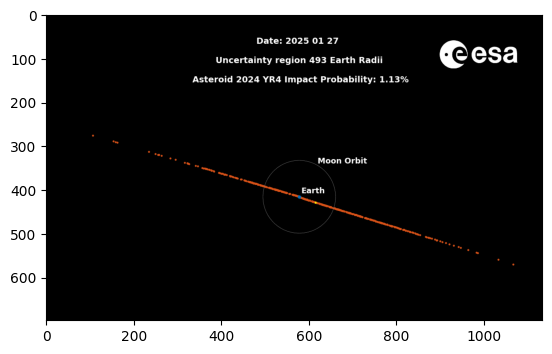

In [23]:
plt.imshow(image)

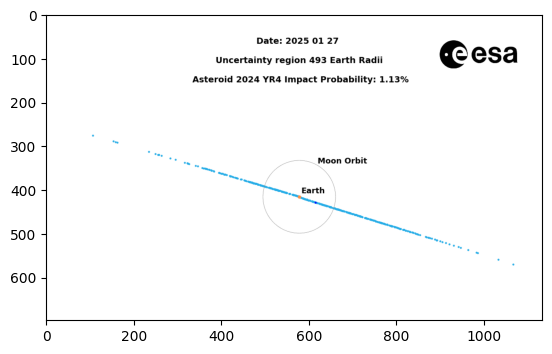

In [24]:
plt.imshow(inverted_image)

Fatiando o texto de maneira simples  para identificar a DATA e o RISCO de impacto. O ":" é o elemento chave de separação, ele aparece logo após Date e Probability, cujos valores nos interessam.
No caso do Risco, também removemos o "%" da percentagem e transformamos o caracter em número (float).

In [25]:
stext = text.split(":")
date = stext[1].split("\n")[0]
risk = float(stext[2].split("\n")[0].split("%")[0])
print(date)
print(risk)

 2025 01 27
1.13


Realizando a operação acima em bloco para todas a imagens individuais e salvando em um dicionário, que é uma estrutura de dados do Python que organiza um "índice" e um valor.
Caso a imagem não tenha boa leitura dos caracteres, usamos o try para lidar com o erro.

In [26]:
dic = {}
for frame in range(gif.n_frames):
    image = Image.open(f"frame_{frame}.png")
    image = image.convert("RGB")  # Convert to RGB to support inversion
    inverted_image = ImageOps.invert(image)
    text = pytesseract.image_to_string(inverted_image)
    stext = text.split(":")
    try:
        date = stext[1].split("\n")[0]
        risk = float(stext[2].split("\n")[0].split("%")[0])
        dic[date] = risk
    except:
        pass


Esse é o conteúdo do dicionário. Usando a data como índice (chave) e o risco como valor.

In [27]:
dic

{' 2025 01 27': 1.13,
 ' 2025 01 28': 1.22,
 ' 2025 01 29': 1.31,
 ' 2025 01 30': 1.27,
 ' 2025 01 31': 1.57,
 ' 2025 02 01': 1.62,
 ' 2025 02 02': 1.41,
 ' 2025 02 03': 1.52,
 ' 2025 02 05': 1.83,
 ' 2025 02 06': 2.23,
 ' 2025 02 10': 1.99,
 ' 2025 02 17': 2.41,
 ' 2025 02 18': 2.81,
 ' 2025 02 19': 0.94,
 ' 2025 02 20': 0.15}

Finalmente, a figura do risco de colisão em função da data.
Note como o risco caiu recentemente. Ufa! 😀 ☄ ⭐

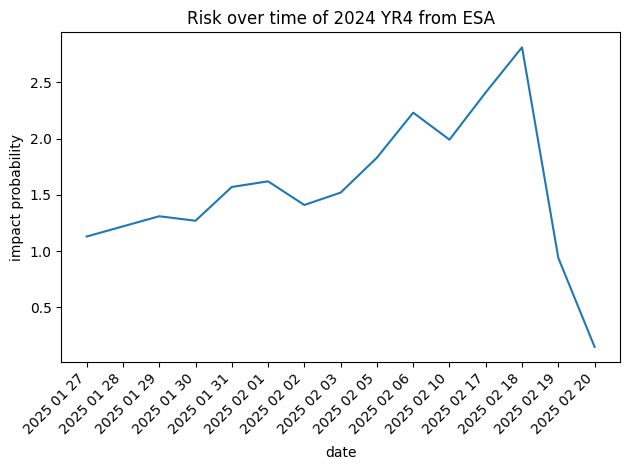

In [28]:
plt.plot(list(dic.keys()), list(dic.values()))
plt.xlabel('date')
plt.ylabel('impact probability')
plt.title('Risk over time of 2024 YR4 from ESA')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()